# LSTM (Long Short Term Memory)

Part, Specific Implementation of RNN Networks (Recurrent Neural Network)

In [8]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import MinMaxScaler 

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import matplotlib.pyplot as mt 

# Load the data

In [2]:
ds = ps.read_csv("./datasets/Google_Stock_Price_Train.csv")
ds.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
dtypes: float64(1)
memory usage: 10.0 KB


In [4]:
ds['Close']= ds['Close'].str.replace(',', '') # Replaceing ',' from the column and convert into numeric format
ds['Close']= ps.to_numeric(ds['Close']) #test_data['Close']= test_data['Close'].str.replace(',', '')


# Create Output Dataframe
ds= ds[['Close']]
ds

,Close
0,663.59
1,666.45
2,657.21
3,648.24
4,620.76
...,...
1253,789.91
1254,791.55
1255,785.05
1256,782.79


In [6]:
ds1=ds.reset_index()['Close']

In [7]:
ds1

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

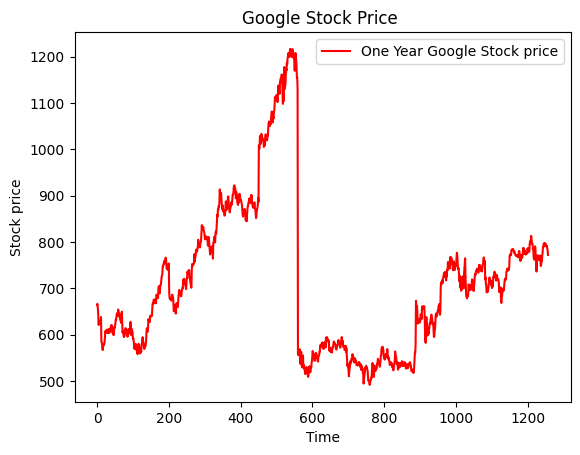

In [9]:
mt.plot(ds1, color = 'red', label = 'One Year Google Stock price')
mt.title("Google Stock Price ")
mt.xlabel('Time')
mt.ylabel('Stock price')
mt.legend()
mt.show()

# Scale the data

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
ds=scaler.fit_transform(np.array(ds1).reshape(-1,1))
print(ds)

[[0.23757287]
 [0.24151427]
 [0.22878051]
 ...
 [0.40495845]
 [0.40184391]
 [0.38672602]]


In [11]:
ds.shape

(1258, 1)

# Split the data into train and test

In [12]:
TRAIN_SIZE = 0.7

training_size = int(len(ds) * TRAIN_SIZE)   

test_size = len(ds) - training_size 

# from 0 to 880 will in training size and rest all will be in test_size
training_data,testing_data =  ds[0 : training_size, :  ],  ds[training_size:len(ds) ,  :1] 

In [13]:
training_size,test_size

(880, 378)

# Create a Dataset for LSTM as inputs 

- 0-99 (are inputs) --> 100 is the output
- 1-100 (are inputs) --> 101 is the output

In [14]:

def create_ds(ds,time_step =1):
    dataX , dataY = [] , []
    
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0] # as our time_step is 100 so i=0 0,1,2,3...99 will in X_tain and 101 will be in Y_train
        dataX.append(a)
        dataY.append(ds[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [15]:
time_step = 100 # here we are taking 100 timestamp 
X_train , Y_train = create_ds(training_data, time_step) # first we are giving the training
X_test , Y_test = create_ds(testing_data, time_step)

In [16]:
print(X_train) 

[[0.23757287 0.24151427 0.22878051 ... 0.14878106 0.16067417 0.15270868]
 [0.24151427 0.22878051 0.21641884 ... 0.16067417 0.15270868 0.13603352]
 [0.22878051 0.21641884 0.1785483  ... 0.15270868 0.13603352 0.13989223]
 ...
 [0.04152254 0.04815126 0.05285063 ... 0.06427518 0.06067831 0.05579979]
 [0.04815126 0.05285063 0.04848201 ... 0.06067831 0.05579979 0.04178438]
 [0.05285063 0.04848201 0.06100905 ... 0.05579979 0.04178438 0.04039249]]


In [17]:
print(X_test.shape),
print(Y_test.shape)

(277, 100)
(277,)


(None, None)

# Converting in 3x Dimensional 

[sample, timestep, feautures]

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1) ## and we are converting in 3 dimensional
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

# Build the model

In [19]:
model=Sequential()

## 1st Layer
model.add(LSTM(50, return_sequences=True, input_shape=(100,1))) 

## 2nd layer
model.add(LSTM(50, return_sequences=True )) 

## 3rd layer
model.add(LSTM(50)) 


model.add(Dense(1)) ## output


c:\Python\Python3125\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(loss='mean_squared_error',optimizer='Adam') 

In [21]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=64,verbose=1)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 799ms/step - loss: 0.0930 - val_loss: 0.0104
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 511ms/step - loss: 0.0237 - val_loss: 0.0075
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 536ms/step - loss: 0.0107 - val_loss: 0.0012
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 528ms/step - loss: 0.0094 - val_loss: 0.0017
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 465ms/step - loss: 0.0085 - val_loss: 0.0011
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 453ms/step - loss: 0.0083 - val_loss: 0.0025
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - loss: 0.0052 - val_loss: 7.5454e-04
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 552ms/step - loss: 0.0061 - val_loss: 8.7910e-04
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 475ms/step - loss: 0.0050 - val_loss: 0.0010
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 456ms/step - loss: 0.0043 - val_loss: 7.8540e-04


# Predictions

In [23]:
train_predict = model.predict(X_train)
 
test_predict = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 293ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


# Inverse Scaling

In [24]:
train_predict=scaler.inverse_transform(train_predict) # for train metrics
test_predict=scaler.inverse_transform(test_predict) # for test metrics

# Plot the data

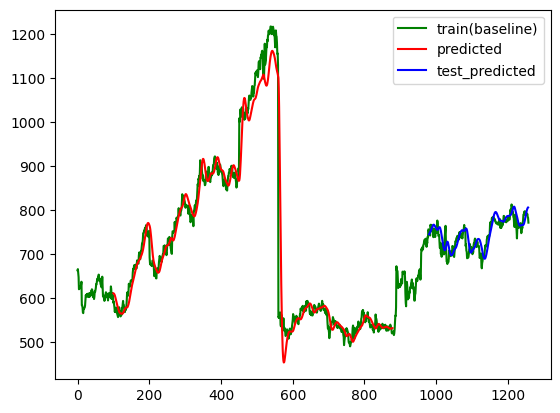

In [25]:
look_back=100 # time_step is 100

# Create empty numbers to plot parts of the graph
train_predict_plot = np.empty_like(ds)


train_predict_plot[:, :] = np.nan


train_predict_plot [look_back:len(train_predict) + look_back, :] = train_predict


# shift test predictions for plotting
test_predict_plot = np.empty_like(ds)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(ds)-1, :] = test_predict


# Plot original data --> inverse the scaled original dataframe
plt.plot(scaler.inverse_transform(ds), color = "green", label ="train(baseline)") # we need to do scaler.inverse it is IMP

# Plot part of predicted data from train
plt.plot(train_predict_plot,  color = "red",label ="predicted")

# Plot part of predicted data from test
plt.plot(test_predict_plot, color = "blue", label ="test_predicted")
plt.legend()
plt.show()